## Clasificador de vinos

Construir un notebook de python que prediga la calidad del vino a partir de un archivo:

 El archivo wine-red.csv tiene los datos necesarios para entrenar el modelo predictivo. Se busca predecir la columna quality.

 Antes de comenzar a trabajar con los datos, se debe realizar un análisis exploratorio de los mismos, graficando cada variable con box-plots, analizando la distribución de las calidades de vino con un histograma y realizar otras visualizaciones que le permitan entender el conjunto de datos y el poder predictivo de dichas variables.

 Usando un 20% de los datos para validación, y el resto para entrenamiento y testeo, se deben implementar al menos 2 algoritmos de predicción de la calidad del vino, con al menos un pre-procesamiento para ajustar los datos de forma de mejorar las posibilidades de éxito del algoritmo.

Evaluar los modelos entrenados, usando los datos de validación, analizando la métrica Accuracy.

Opcional (avanzado):

Graficar un comparativo de los resultados de los modelos, seleccionar uno de ellos para su uso y explicar el criterio de selección del modelo.

 Optimizarlo con un modelo de búsqueda de hiperparámetros del tipo gridsearch.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
wine_red= pd.read_csv('./winequality-red.csv', sep=',')

Primero, realizo boxplots para ver la distribución de cada variable para vinos de diferente calidad.

C:\Users\etorr\AppData\Local\Temp\ipykernel_26312\4280434290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=wine_red.columns[i], data=wine_red, ax= axes[i], palette="hls")
C:\Users\etorr\AppData\Local\Temp\ipykernel_26312\4280434290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=wine_red.columns[i], data=wine_red, ax= axes[i], palette="hls")
C:\Users\etorr\AppData\Local\Temp\ipykernel_26312\4280434290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=wine_red.columns[i], data=wine_red,

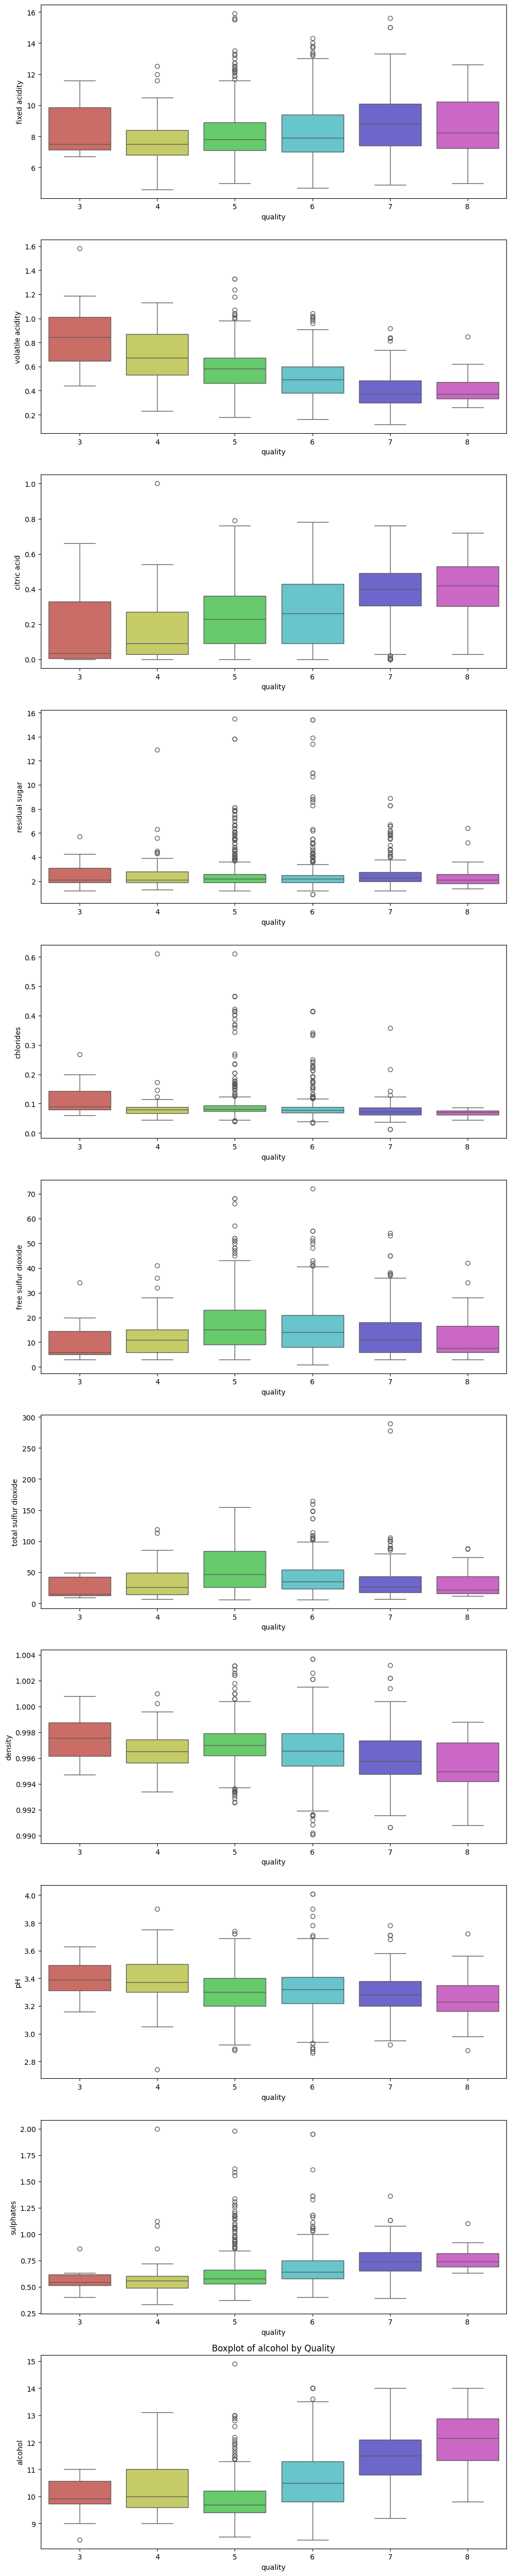

In [4]:
fig, axes= plt.subplots(len(wine_red.columns)-1, 1, figsize=(10, 50))
for i in range(0, len(wine_red.columns)-1):
    sns.boxplot(x='quality', y=wine_red.columns[i], data=wine_red, ax= axes[i], palette="hls")
    plt.title(f'Boxplot of {wine_red.columns[i]} by Quality')

plt.tight_layout()
plt.show()

Observando los box plots, puedo deducir lo siguiente:

1. La acidez volátil tiende a ser menor en vinos de mejor calidad.
2. La concentración de sulfatos y el contenido de alcohol tiende a ser mayor en vinos de mayor calidad.
3. Para el resto de las variables, no se observan patrones claros de comportamiento respecto a la calidad del vino.
4. Para los vinos con un score de calidad de 4 y 5, se observan múltiples outliers en todas las variables.

Para visualizar la correlación entre las diferentes variables y el score de quality, puedo hacer una matriz de correlaciones:

<Axes: >

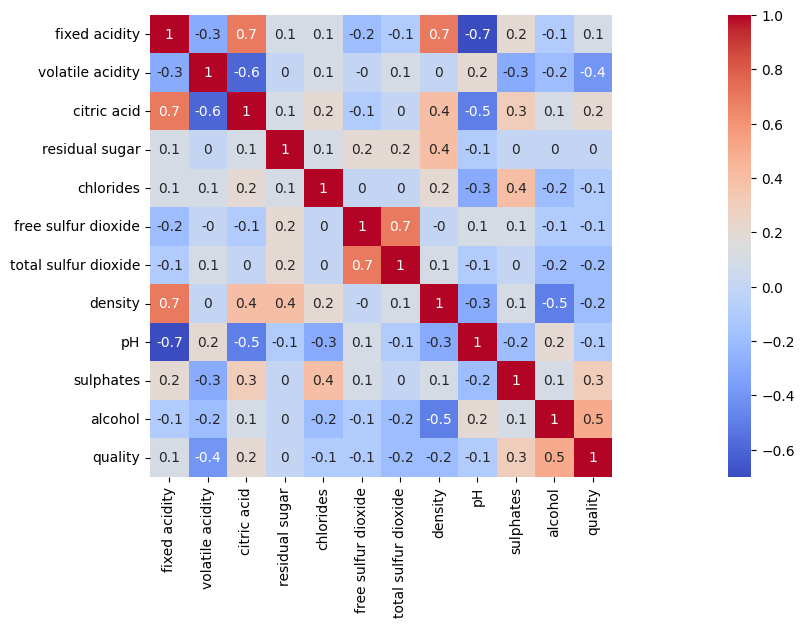

In [5]:
plt.figure(figsize=(30,6))
sns.heatmap(wine_red.corr().round(1), annot=True, cmap='coolwarm', square=True)

Ahora voy a visualizar la distribución de la variable quality usando un histograma.

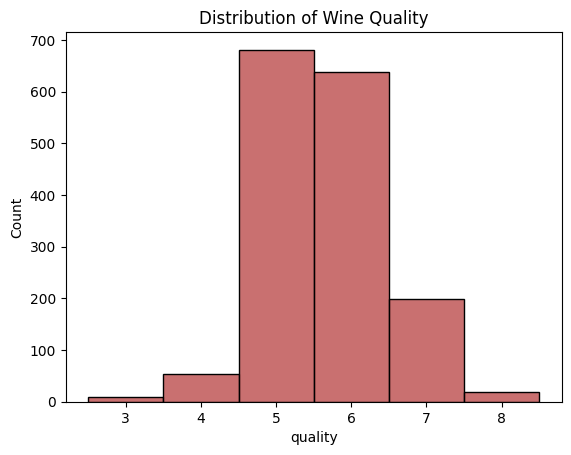

In [6]:


sns.histplot(data=wine_red, x='quality', element='bars', binwidth=1, binrange=(wine_red['quality'].min() - 0.5, wine_red['quality'].max() + 0.5), color="#b74040")

plt.title('Distribution of Wine Quality')

plt.show()

A partir del histograma, podemos ver que la moda se encuentra en 5. Además, parecería que la variable quality responde a una distribución normal (habría que compobarlo).

Utilizando la función describe(), voy a obtener algunos estadísticos descriptivos del set de datos:

In [7]:
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Como se pudo observar en los box plots, muchas de las variables presentan una desviación estándar elevada, en algunos casos de más del 50% con respecto a la media.

Ahora procedo a entrenar modelos de aprendizaje automático para predecir el score de quality.

In [8]:
X= wine_red.drop('quality', axis= 1)
y= wine_red['quality']

Antes de comenzar con el entrenamiento, aplico PowerTransformer para reducir la asimetría en la distribución de algunas variables, para que se puedan aplicar mejor en modelos como la regresión lineal. También uso StandardScaler para llevar todas las variables a la misma escala para que todas las variables tengan el mismo peso.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
transformer= PowerTransformer()
scaler= StandardScaler()

In [10]:
X= scaler.fit_transform(transformer.fit_transform(X))

In [11]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [24]:
knn= KNeighborsClassifier()
svc= SVC()
dtc= DecisionTreeClassifier()
rfc= RandomForestClassifier()

results= []
names= []
models= [knn, svc, dtc, rfc]


In [25]:
X_temp , X_val , y_temp , y_val = train_test_split(X, y, random_state=42, test_size= 0.2)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size= 0.2)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
for model in models:
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    print(f'{model.__class__.__name__} accuracy: {accuracy_score(y_test, y_pred):.4f}\n')
    print(f'{model.__class__.__name__} confusion matrix: \n{confusion_matrix(y_test, y_pred)}\n')
    print(f'{model.__class__.__name__} classification report: \n{classification_report(y_test, y_pred)}\n')
    print('\n')
    results.append(accuracy_score(y_test, y_pred))


KNeighborsClassifier accuracy: 0.5469

KNeighborsClassifier confusion matrix: 
[[ 1  0  2  0  0  0]
 [ 0  0  6  4  1  0]
 [ 0  3 75 37  4  0]
 [ 0  0 37 53 11  0]
 [ 0  0  5  3 11  0]
 [ 0  0  0  2  1  0]]

KNeighborsClassifier classification report: 
              precision    recall  f1-score   support

           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00        11
           5       0.60      0.63      0.61       119
           6       0.54      0.52      0.53       101
           7       0.39      0.58      0.47        19
           8       0.00      0.00      0.00         3

    accuracy                           0.55       256
   macro avg       0.42      0.34      0.35       256
weighted avg       0.53      0.55      0.54       256




SVC accuracy: 0.6055

SVC confusion matrix: 
[[ 0  0  2  1  0  0]
 [ 0  0  7  3  1  0]
 [ 0  0 82 36  1  0]
 [ 0  0 34 64  3  0]
 [ 0  0  2  8  9  0]
 [ 0  0  0  3  0  0]]

SVC classification report: 
 

c:\Users\etorr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\etorr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\etorr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

RandomForestClassifier accuracy: 0.6914

RandomForestClassifier confusion matrix: 
[[ 0  0  2  1  0  0]
 [ 1  0  5  4  1  0]
 [ 0  0 89 28  2  0]
 [ 0  0 24 74  3  0]
 [ 0  0  2  3 14  0]
 [ 0  0  0  2  1  0]]

RandomForestClassifier classification report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.73      0.75      0.74       119
           6       0.66      0.73      0.69       101
           7       0.67      0.74      0.70        19
           8       0.00      0.00      0.00         3

    accuracy                           0.69       256
   macro avg       0.34      0.37      0.36       256
weighted avg       0.65      0.69      0.67       256






c:\Users\etorr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\etorr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\etorr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

A partir de estos resultados, grafico los valores de accuracy calculados con los datos de test:

Text(0, 0.5, 'Modelo')

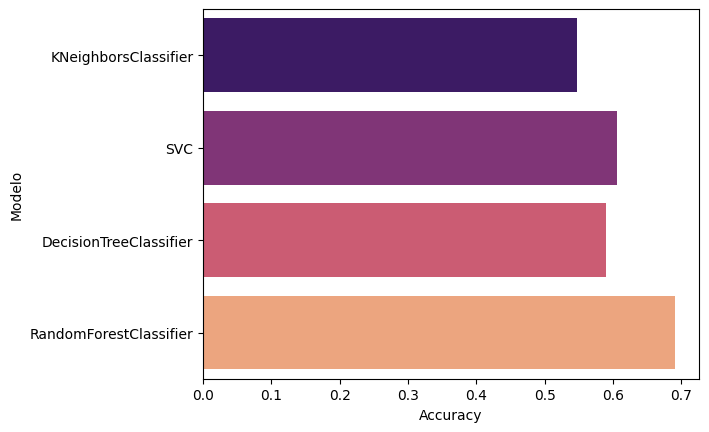

In [27]:
sns.barplot(y= [model.__class__.__name__ for model in models], x= results, hue=[model.__class__.__name__ for model in models] , palette='magma', orient='h')
plt.xlabel('Accuracy')
plt.ylabel('Modelo')

De los 4 modelos utilizados, RandomForestClassifier tiene un accuracy mayor a los demás.

Para seleccionar un modelo, voy a utilizar kfold y model_selection para hacer una cross validation

In [16]:
from sklearn import model_selection
results = []
labels = []
for model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    labels.append(model.__class__.__name__)
    print(f'{model.__class__.__name__} accuracy: {cv_results.mean()}')
    print(f'{model.__class__.__name__} accuracy std: {cv_results.std()}')
    print('\n')


KNeighborsClassifier accuracy: 0.5758043023034457
KNeighborsClassifier accuracy std: 0.039054030566762404


SVC accuracy: 0.613944412716543
SVC accuracy std: 0.03433007048769897


DecisionTreeClassifier accuracy: 0.5845516847515706
DecisionTreeClassifier accuracy std: 0.03224899342631154


RandomForestClassifier accuracy: 0.6677041690462594
RandomForestClassifier accuracy std: 0.04103999596941618




Ahora visualizo los resultados de la cross validation con boxplots.

In [17]:
results= pd.DataFrame(results)
results

,0,1,2,3,4,5,6,7,8,9
0,0.601942,0.572816,0.504854,0.568627,0.637255,0.549020,0.627451,0.578431,0.588235,0.529412
1,0.611650,0.582524,0.582524,0.637255,0.656863,0.598039,0.647059,0.617647,0.656863,0.549020
2,0.611650,0.582524,0.563107,0.617647,0.598039,0.617647,0.607843,0.539216,0.588235,0.519608
3,0.660194,0.650485,0.631068,0.686275,0.715686,0.627451,0.735294,0.607843,0.715686,0.647059


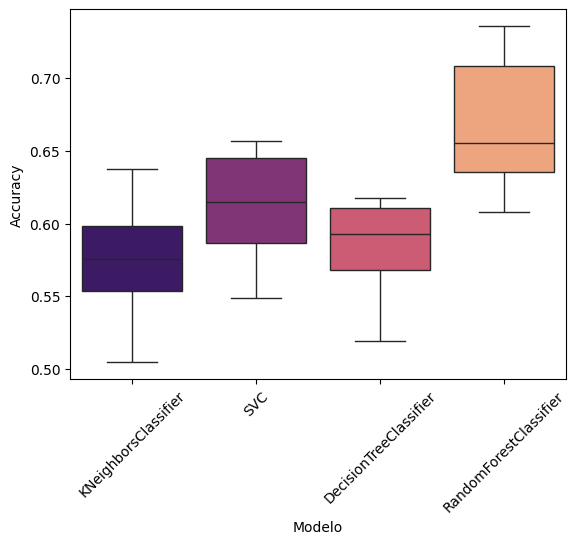

In [21]:
sns.boxplot(results.transpose().rename(columns={0:labels[0], 1:labels[1], 2:labels[2], 3:labels[3]}), palette= 'magma')
plt.ylabel('Accuracy')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.show()


Luego de evaluar accuracy con cross-validation, se puede observar que RandomForestClassifier es el modelo evaluado con mejor accuracy, por lo cual se selecciona este.

Además, el RandomForestClassifier presenta algunas ventajas frente al DecisionTree. En primer lugar, tiende a corregir el overfitting que suele ocurrir con los DecisionTrees, mientras que a la misma vez mantiene el poder predictivo de los mismos.

Ya que selecciono el RandomForestClassifier, procedo a realizar la búsqueda de hiperparámetros mediante GridSearch.

In [19]:
from sklearn.model_selection import GridSearchCV
parameter_grid= { 'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}

grid_search= GridSearchCV(rfc, parameter_grid, cv= 5, scoring= 'accuracy')
grid_search.fit(X_train, y_train)

print('Mejores hiperparámetros: ', grid_search.best_params_)
print('Mejor score en CV: ', grid_search.best_score_)

Mejores hiperparámetros:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Mejor score en CV:  0.6656814921090388


Ahora evalúo con los datos de validación

In [22]:
best_model= grid_search.best_estimator_
y_pred = best_model.predict(X_val)

print('Accuracy en validation: ', accuracy_score(y_val, y_pred))
print('Matriz de confusión: ', confusion_matrix(y_val, y_pred))
print('Reporte de clasificación: ', classification_report(y_val, y_pred))

Accuracy en validation:  0.646875
Matriz de confusión:  [[ 0  0  1  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 99 30  1  0]
 [ 0  0 36 88  8  0]
 [ 0  0  1 20 20  1]
 [ 0  0  0  1  4  0]]
Reporte de clasificación:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.69      0.76      0.73       130
           6       0.62      0.67      0.64       132
           7       0.61      0.48      0.53        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.61      0.65      0.63       320



c:\Users\etorr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\etorr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\etorr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

Al igual que los otros modelos, se puede observar que no se logró predecir los scores más bajos (3 y 4).